In [1]:
import os
import numpy as np
import torch
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
cwd = Path(os.getcwd())
os.chdir(str(cwd.parent))
print(os.getcwd())

/home/arnaudo/links/shelter/flood-segmentation


In [36]:
from floods.trainer import smooth_tiling
import importlib
importlib.reload(smooth_tiling)

<module 'floods.trainer.smooth_tiling' from '/home/arnaudo/links/shelter/flood-segmentation/floods/trainer/smooth_tiling.py'>

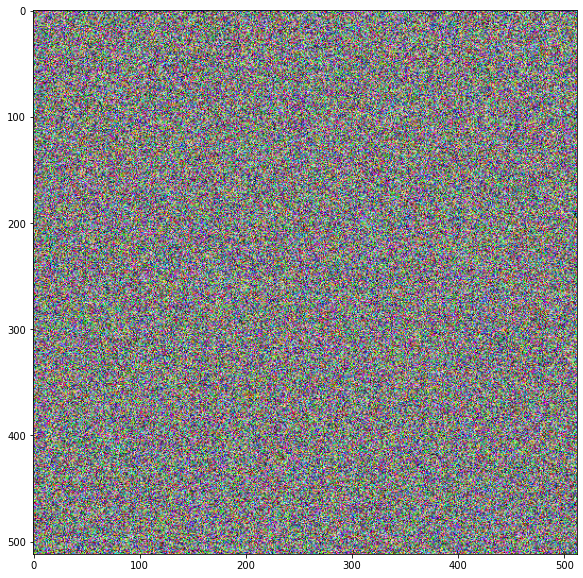

In [4]:
image = np.random.rand(512, 512, 3)
plt.figure(figsize=(10, 10))
plt.imshow(image)

In [37]:
def predict_callback(patch: torch.Tensor):
    """Receives a batch with size [tiles, window, window, channels]
    Returns a batch with size [tiles, window, window, classes]
    """
    res = torch.zeros_like(patch)
    for i in range(patch.shape[0]):
        rgb = (torch.rand(3) - 0.5).reshape(3, 1, 1)
        res[i] = torch.clip(patch[i] - rgb, 0, 1)
    return res.permute(0, 2, 3, 1)

In [ ]:
image = torch.from_numpy(image)

In [38]:
prediction = smooth_tiling.predict_smooth_windowing(image=image, tile_size=128, subdivisions=4, num_classes=3, prediction_fn=predict_callback, batch_size=5, mirrored=True)

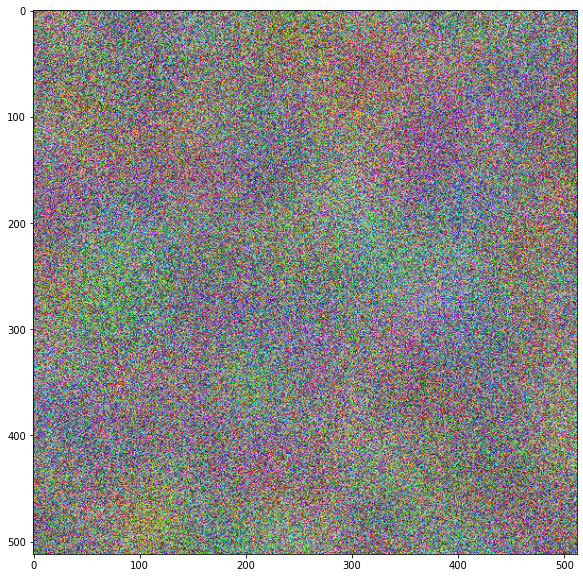

In [39]:
result = prediction.numpy()
plt.figure(figsize=(10, 10))
plt.imshow(result)